In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from evaluate_model import evaluate_model, build_params
from plot_analysis import plot_gof, matrix_TS, plot_points, plot_time_series

# **ISR Dataset**

## No-rain sampling

In [3]:
df_TS = pd.read_pickle('data_calibration/ISR_no_rain/TS_validation.pkl')
X = np.load('data_calibration/ISR_no_rain/no_rain_calib.npz')['params']
df_TS_gof = evaluate_model(X=X, df_TS=df_TS, type_ts='no_rain')
params = build_params(x=X, type_ts='no_rain')
params

{'A1': 0.5927894230376204,
 'A2': 0.555,
 'A3': 10.6,
 'A4': 0.5022,
 'A5': 0.0133,
 'Bd1': 0.11275636149475457,
 'Bd2': 0.34981970579089056,
 'Bd3': 0.11105537890515277,
 'Cd1': 0.5314707152759303,
 'Cd2': 0.5344001059799594,
 'Cd3': 0.5177284089999897,
 'Bw1': 0.10436259734785491,
 'Bw2': 0.48295449247362854,
 'Bw3': 0.10006082472140096,
 'Cw1': 0.5098566245546007,
 'Cw2': 0.6789002755318204,
 'Cw3': 0.5048708663988907}

In [4]:
# GoF statistics

metrics = ['MAE', 'BIAS', 'RMSE', 'NNSE']
stats = ['median', 'min', 'max']

df_stats = pd.DataFrame(index=stats)
for mm in metrics:
    df_stats.loc['median', mm] = df_TS_gof[mm].median()
    df_stats.loc['min', mm] = df_TS_gof[mm].min()
    df_stats.loc['max', mm] = df_TS_gof[mm].max()
df_stats

,MAE,BIAS,RMSE,NNSE
median,1.480282,-0.199715,1.777755,0.513909
min,0.433557,-3.168716,0.532406,0.069519
max,5.048087,5.048087,5.902860,0.864054


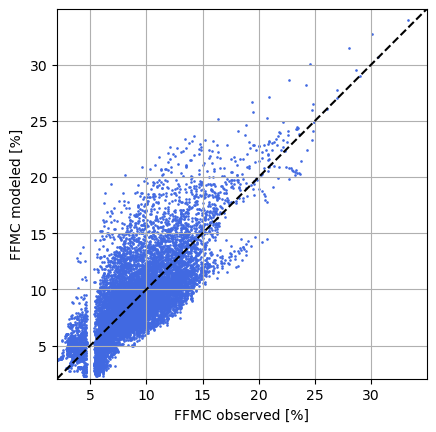

In [5]:
fig_points = plot_points(df_TS, df_TS_gof, clusters=False)
plt.show()

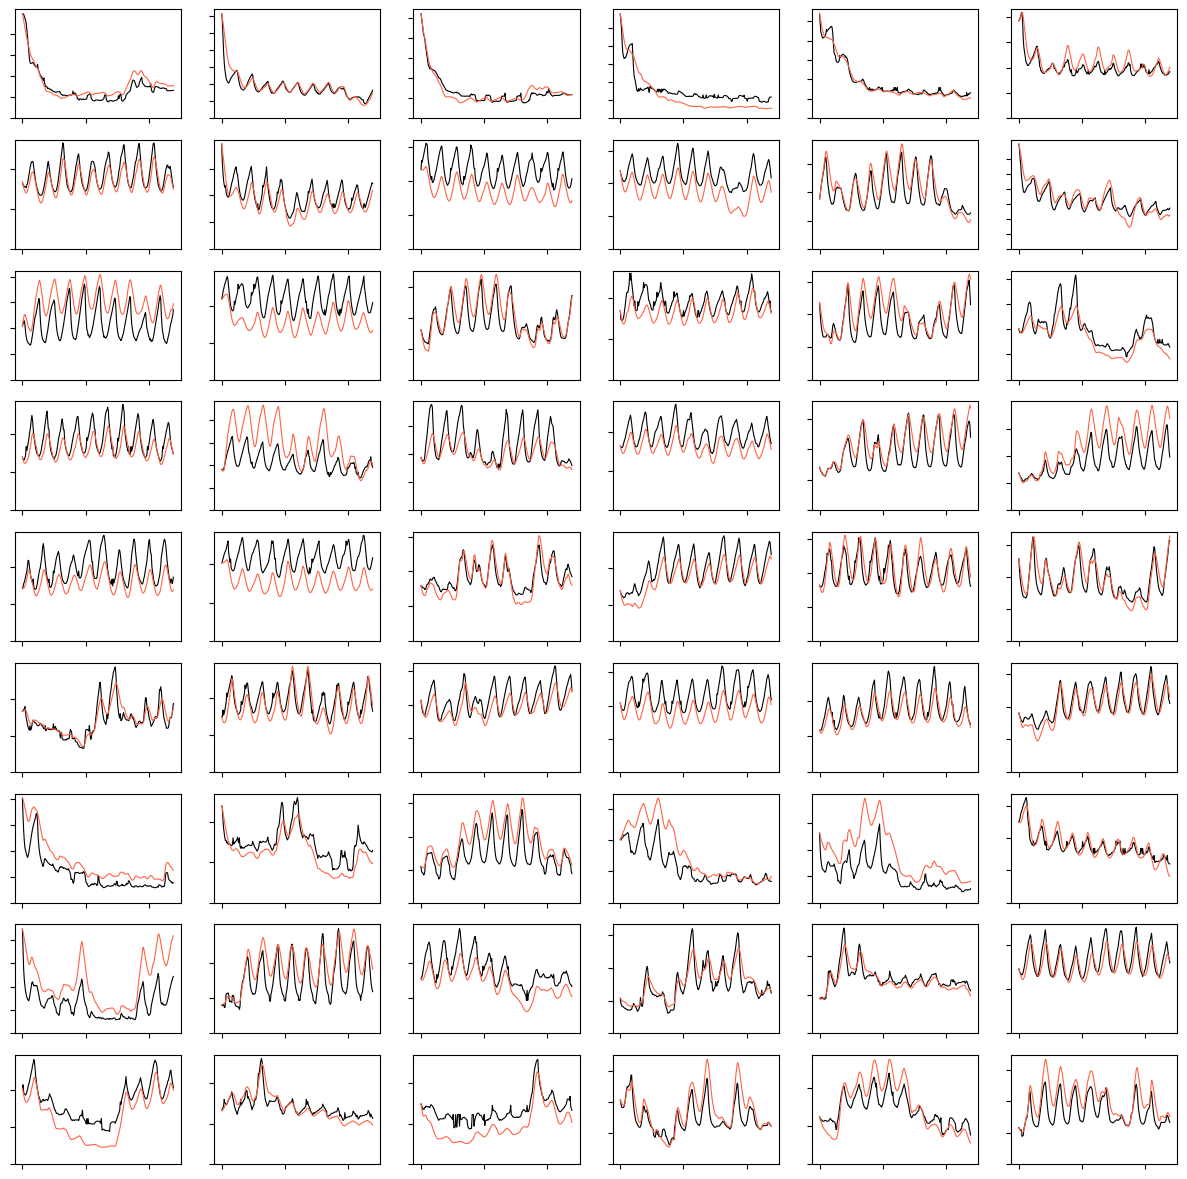

In [6]:
fig_mtx_TS = matrix_TS(df_TS, df_TS_gof, Nrows=9, Ncols=6)
plt.show()

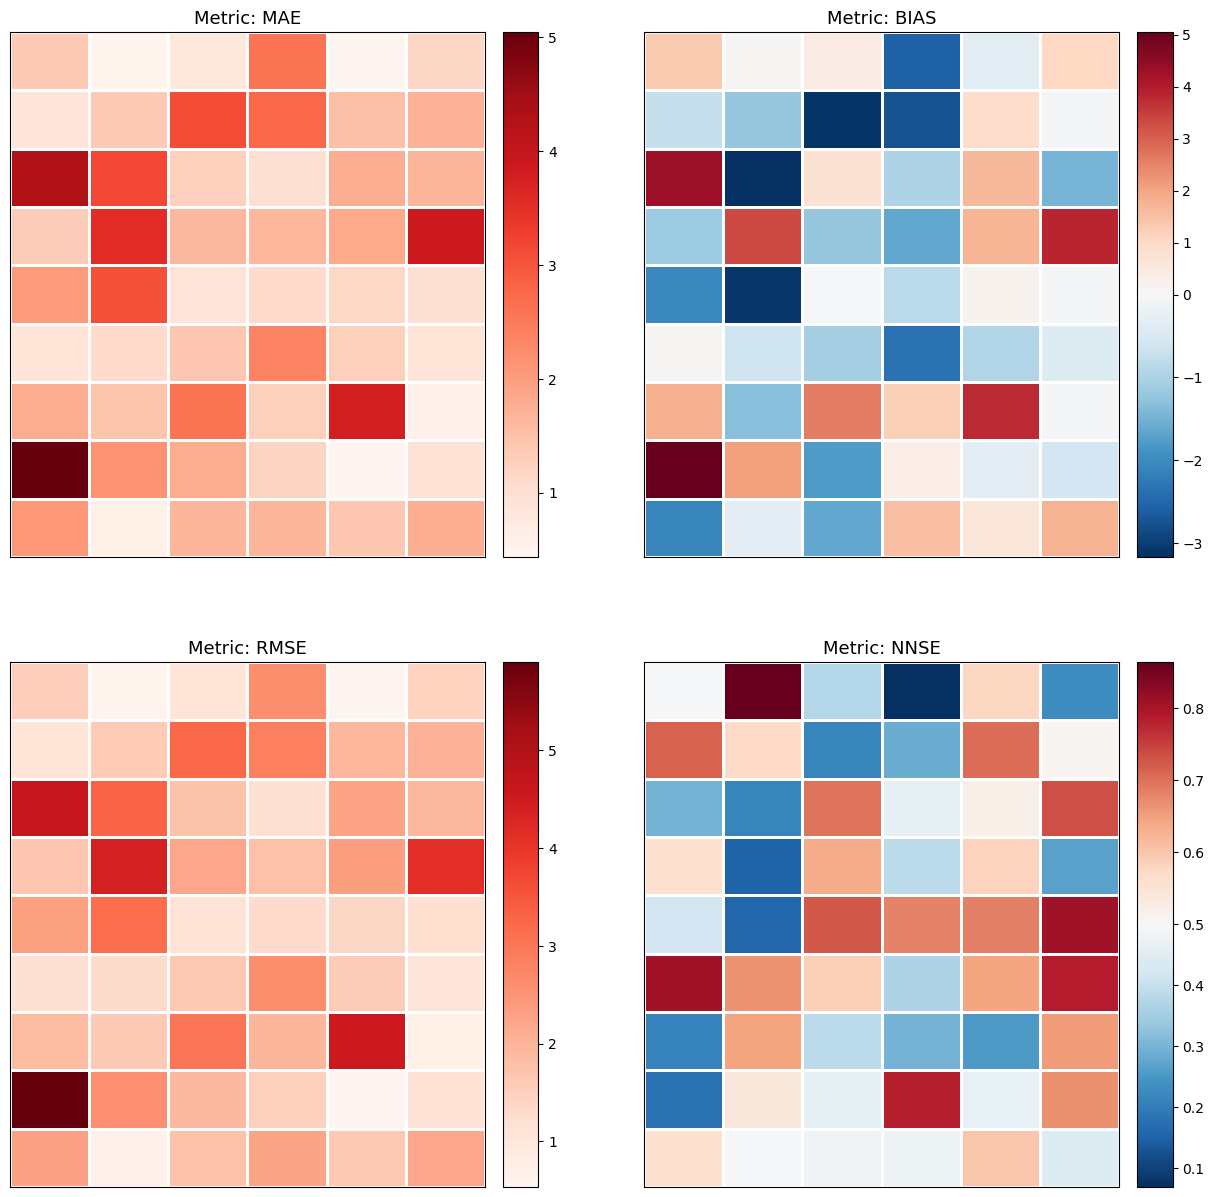

In [7]:
fig_mtx_gof = plot_gof(df_TS_gof, Nrows_grid=9, Ncols_grid=6)
plt.show()

## Rain sampling

In [8]:
df_TS = pd.read_pickle('data_calibration/ISR_rain/TS_validation.pkl')
X = np.load('data_calibration/ISR_rain/rain_calib.npz')['params']
df_TS_gof = evaluate_model(X=X, df_TS=df_TS, type_ts='rain')
params = build_params(x=X, type_ts='rain')
params

{'MIN_RAIN': 0,
 'R1': 68.65896380497416,
 'R2': 53.37406687890216,
 'R3': 0.9359530149554752}

In [9]:
# GoF statistics

metrics = ['MAE', 'BIAS', 'RMSE', 'NNSE']
stats = ['median', 'min', 'max']

df_stats = pd.DataFrame(index=stats)
for mm in metrics:
    df_stats.loc['median', mm] = df_TS_gof[mm].median()
    df_stats.loc['min', mm] = df_TS_gof[mm].min()
    df_stats.loc['max', mm] = df_TS_gof[mm].max()
df_stats

,MAE,BIAS,RMSE,NNSE
median,0.856450,-0.297113,1.061677,0.569311
min,0.180907,-4.276874,0.229431,0.157801
max,4.276874,3.221308,4.693079,0.986950


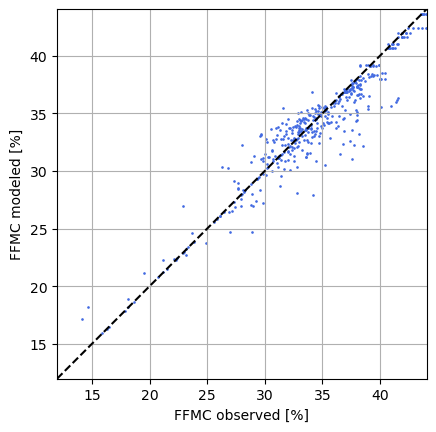

In [10]:
fig_points = plot_points(df_TS, df_TS_gof, clusters=False)
plt.show()

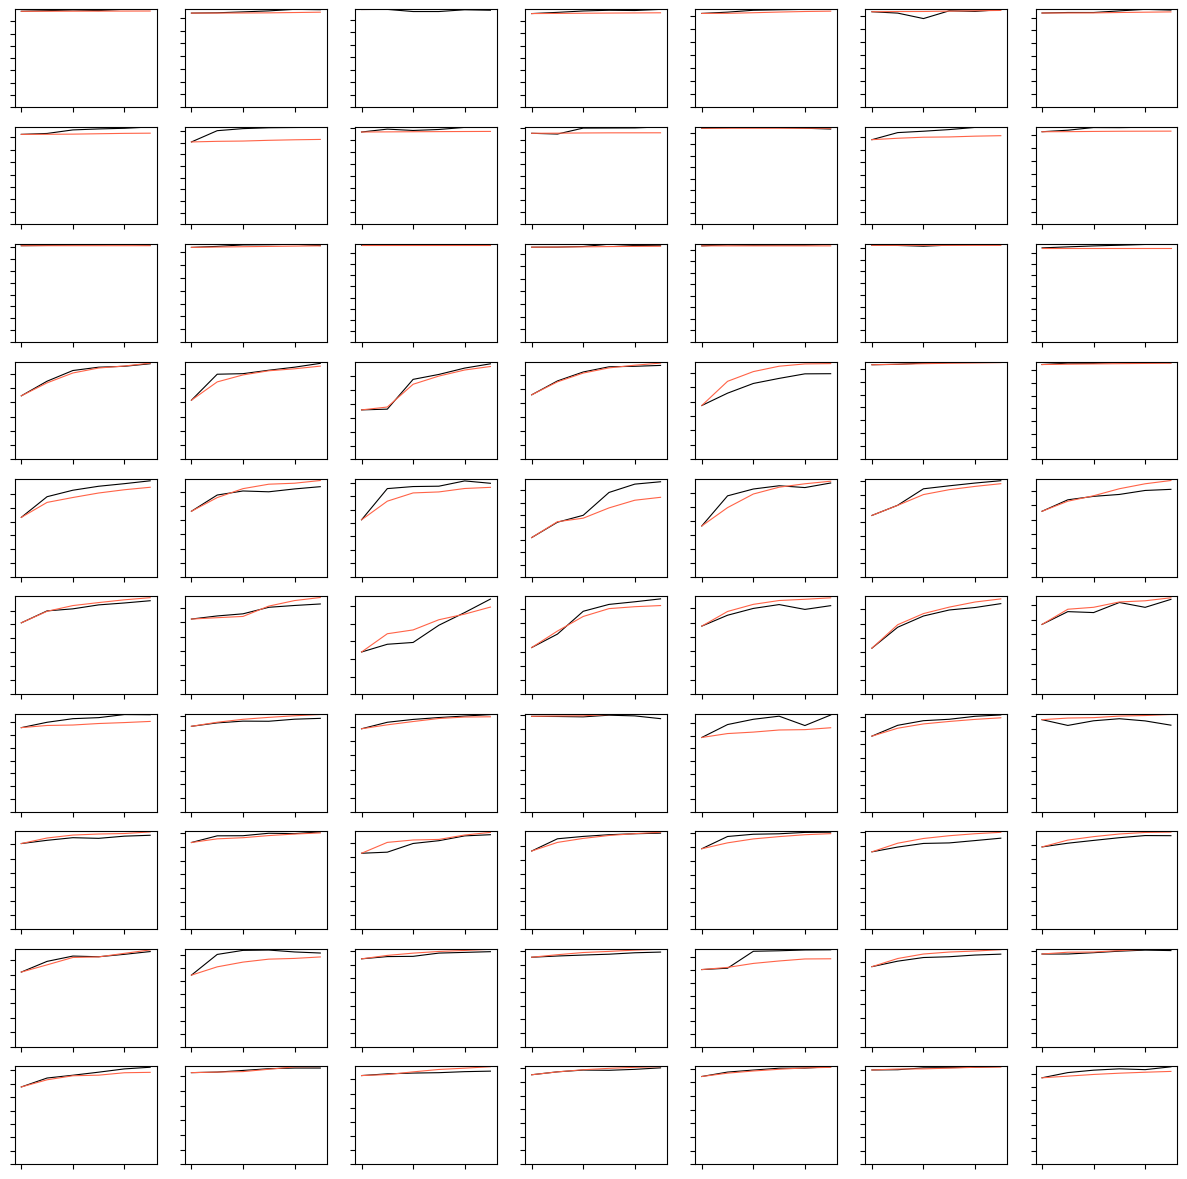

In [11]:
fig_mtx_TS = matrix_TS(df_TS, df_TS_gof, Nrows=10, Ncols=7)
plt.show()

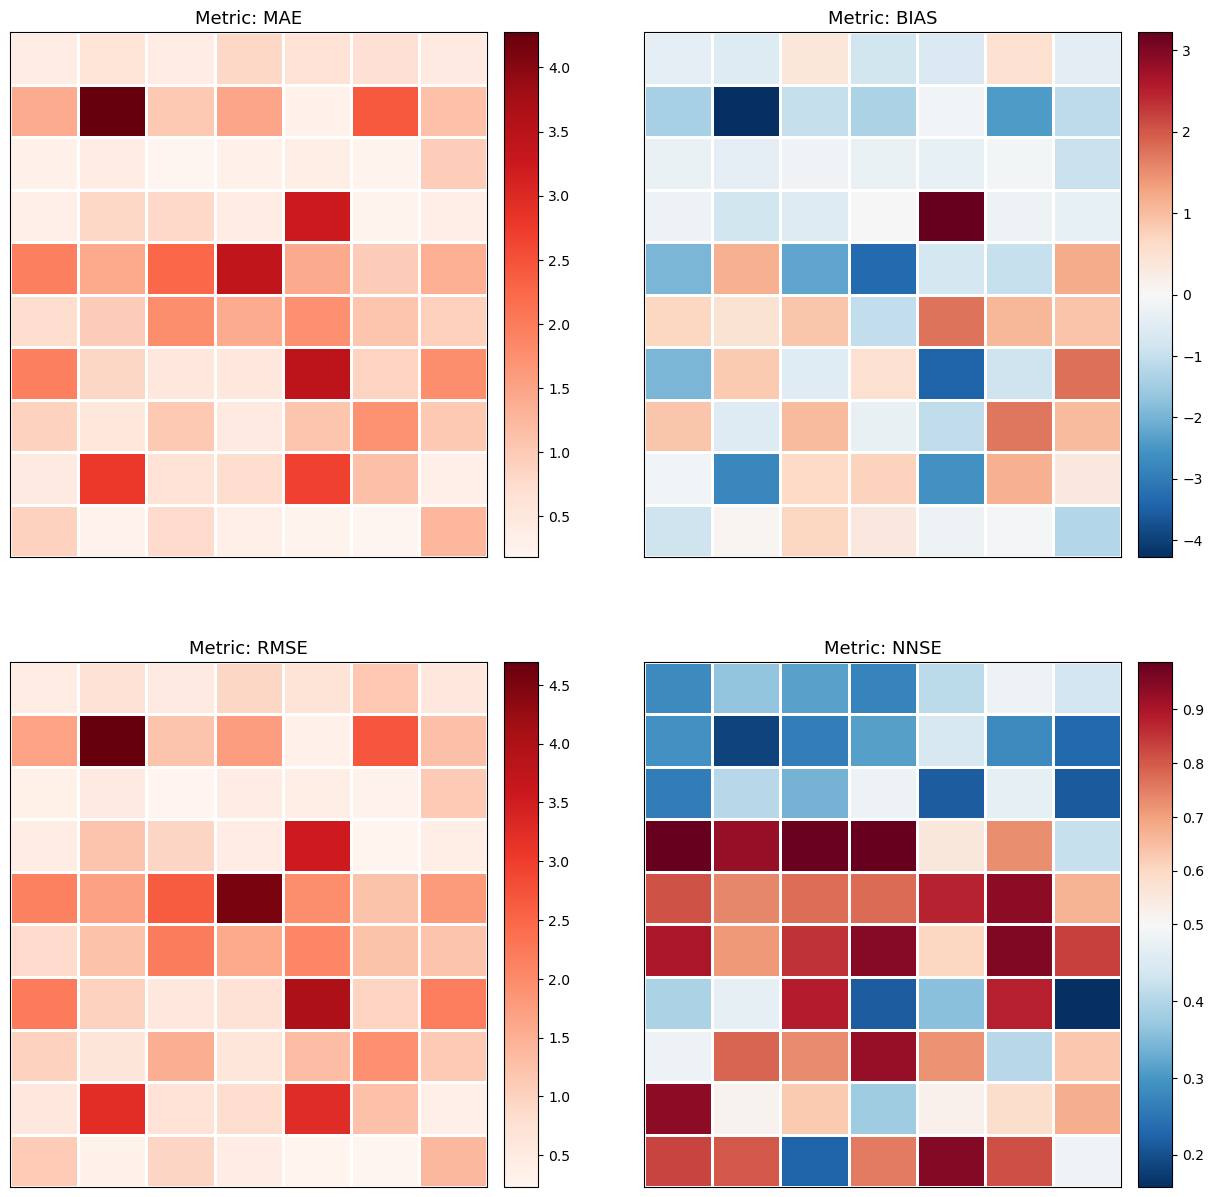

In [12]:
fig_mtx_gof = plot_gof(df_TS_gof, Nrows_grid=10, Ncols_grid=7)
plt.show()

## Mixed sampling

In [15]:
df_TS = pd.read_pickle('data_calibration/ISR_mixed/TS_validation.pkl')
X = np.load('data_calibration/params_calibration.npz')['params']
df_TS_gof = evaluate_model(X=X, df_TS=df_TS, type_ts='mixed')
params = build_params(x=X, type_ts='mixed')
params

{'A1': 0.5927894230376204,
 'A2': 0.555,
 'A3': 10.6,
 'A4': 0.5022,
 'A5': 0.0133,
 'Bd1': 0.11275636149475457,
 'Bd2': 0.34981970579089056,
 'Bd3': 0.11105537890515277,
 'Cd1': 0.5314707152759303,
 'Cd2': 0.5344001059799594,
 'Cd3': 0.5177284089999897,
 'Bw1': 0.10436259734785491,
 'Bw2': 0.48295449247362854,
 'Bw3': 0.10006082472140096,
 'Cw1': 0.5098566245546007,
 'Cw2': 0.6789002755318204,
 'Cw3': 0.5048708663988907,
 'MIN_RAIN': 0.1,
 'R1': 68.65896380497416,
 'R2': 53.37406687890216,
 'R3': 0.9359530149554752}

In [16]:
# GoF statistics
# for all and for the three clusters

metrics = ['MAE', 'BIAS', 'RMSE', 'NNSE']
stats = ['median', 'min', 'max']
cls = [0, 1, 2]

df_stats = pd.DataFrame(index=stats)
for mm in metrics:
    df_stats.loc['median', mm] = df_TS_gof[mm].median()
    df_stats.loc['min', mm] = df_TS_gof[mm].min()
    df_stats.loc['max', mm] = df_TS_gof[mm].max()

for cl in cls:
    for mm in metrics:
        df_stats.loc['median', f'{mm}_{cl+1}'] = df_TS_gof[df_TS.cluster==cl][mm].median()
        df_stats.loc['min', f'{mm}_{cl+1}'] = df_TS_gof[df_TS.cluster==cl][mm].min()
        df_stats.loc['max', f'{mm}_{cl+1}'] = df_TS_gof[df_TS.cluster==cl][mm].max()
df_stats

,MAE,BIAS,RMSE,NNSE,MAE_1,BIAS_1,RMSE_1,NNSE_1,MAE_2,BIAS_2,RMSE_2,NNSE_2,MAE_3,BIAS_3,RMSE_3,NNSE_3
median,1.840886,-0.024240,2.287523,0.654388,2.771267,0.929697,3.686944,0.805963,1.528163,-0.282581,1.801909,0.551877,2.491494,0.202088,3.358171,0.840357
min,0.467671,-6.252725,0.543999,0.062491,0.977914,-6.252725,1.176805,0.249827,0.467671,-4.165279,0.543999,0.062491,1.052921,-6.051648,1.565493,0.153610
max,7.216044,7.216044,7.635164,0.980232,6.258444,5.039932,7.297402,0.971307,6.787334,6.787334,7.083089,0.918333,7.216044,7.216044,7.635164,0.980232


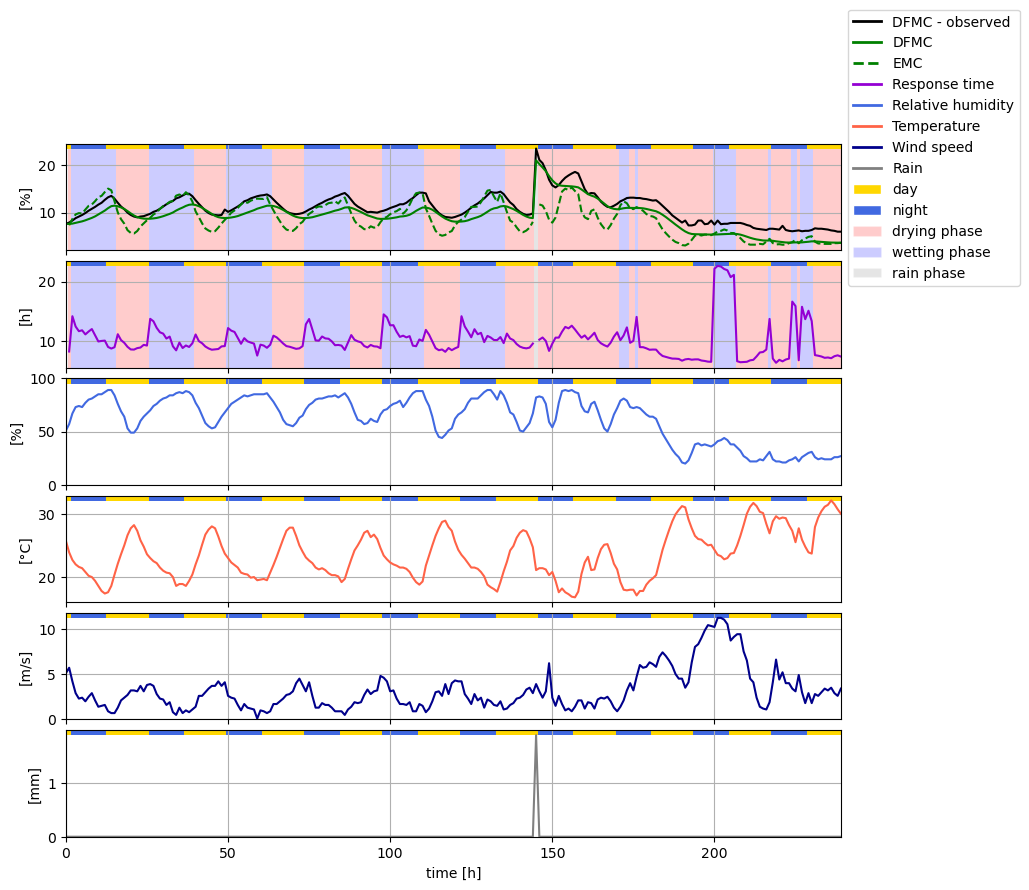

In [17]:
# Plot single time series
idx_TS = 100

time_series = pd.concat([
    pd.concat([df_TS.loc[idx_TS, c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof.loc[idx_TS, c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
plt.show()

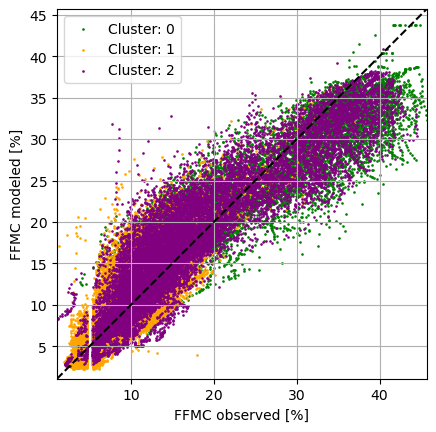

In [18]:
fig_points = plot_points(df_TS, df_TS_gof, clusters=True)
plt.show()

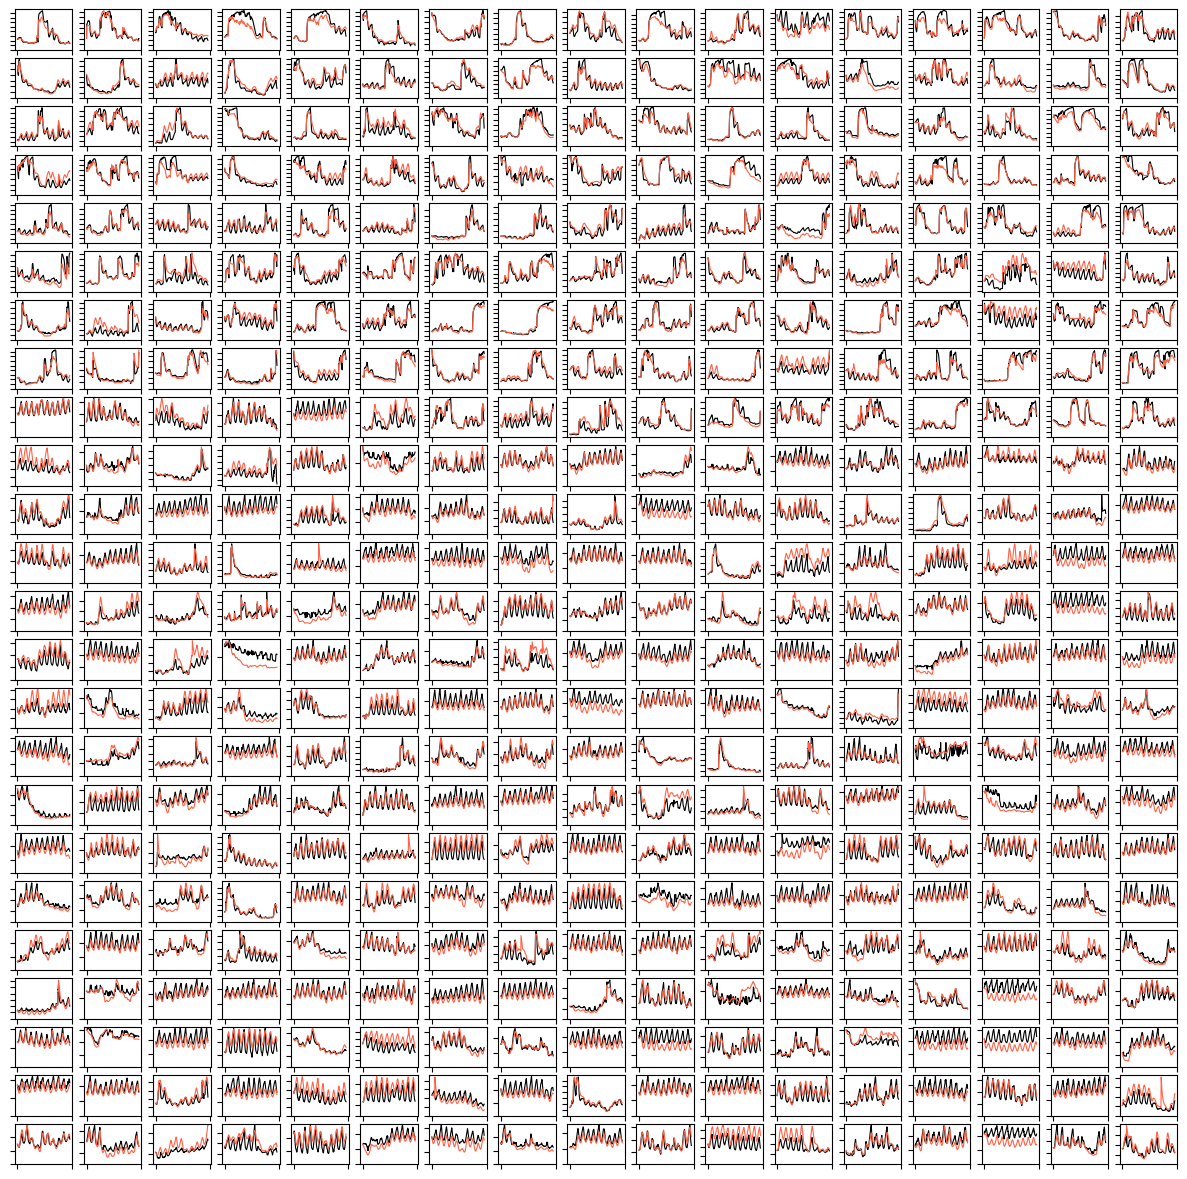

In [19]:
fig_mtx_TS = matrix_TS(df_TS, df_TS_gof)
plt.show()

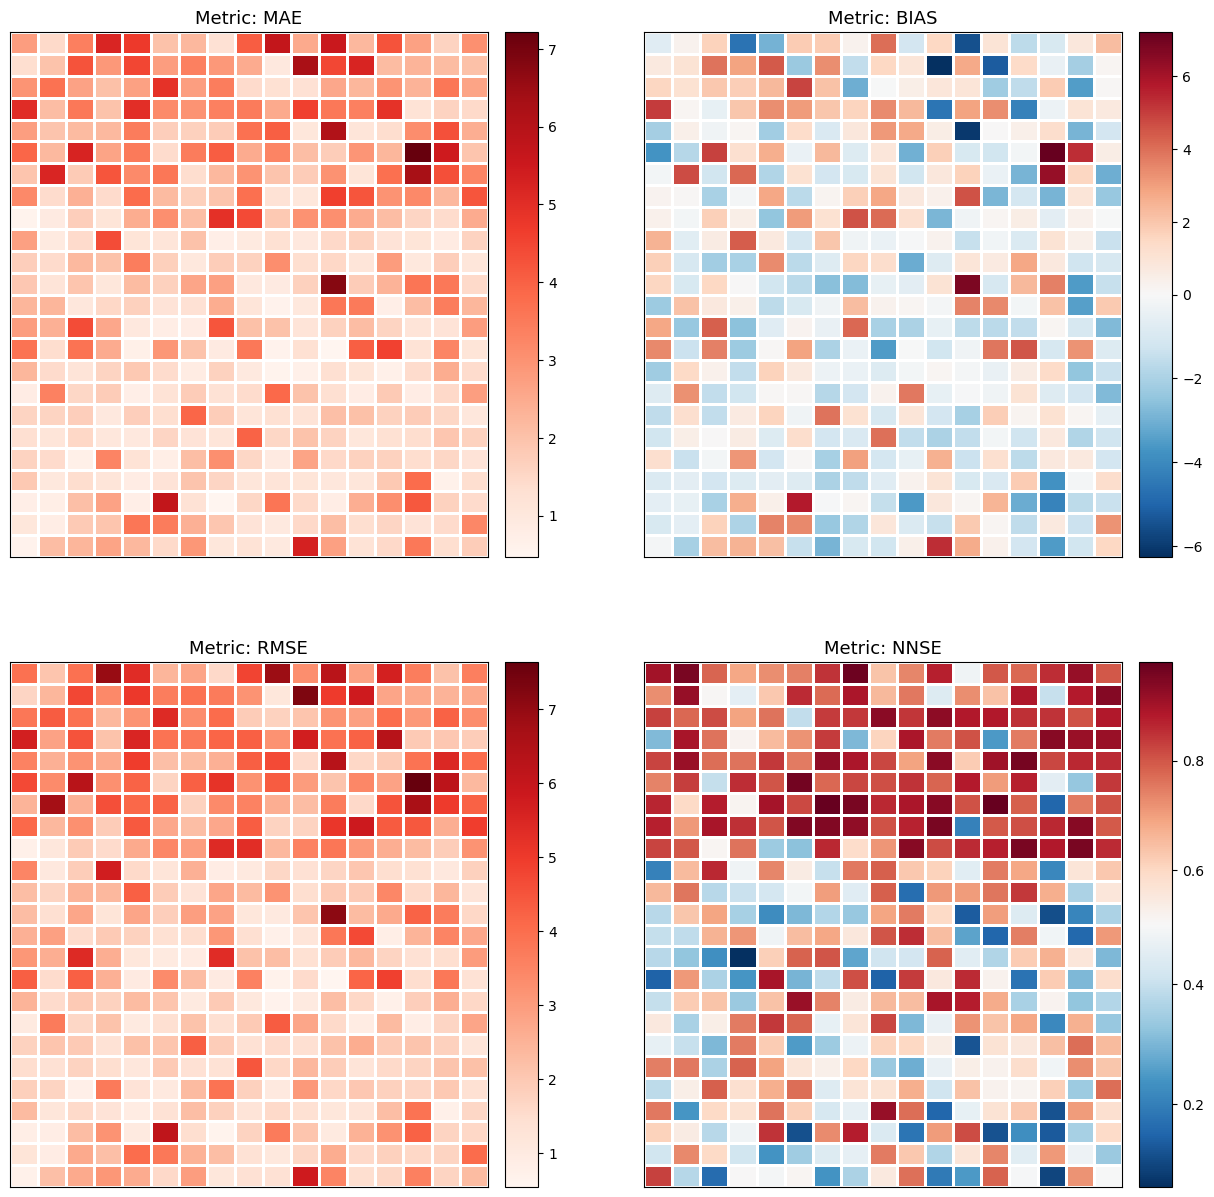

In [20]:
fig_mtx_gof = plot_gof(df_TS_gof)
plt.show()

# **BC Dataset**

## BC1

In [24]:
df_TS = pd.read_pickle('data_calibration/BC/BC1.pkl')
X = np.load('data_calibration/params_calibration.npz')['params']
df_TS_gof = evaluate_model(X=X, df_TS=df_TS, type_ts='mixed')

# GoF measures
df_TS_gof

,DFMC_model,phase,EMC,K_const,MAE,BIAS,RMSE,NNSE
0,0 7.123088 1 8.592153 2 9...,0 -9999 1 1 2 1 3 ...,0 -9999.000000 1 17.124346 2 ...,0 -9999.000000 1 6.996884 2 ...,2.463616,1.981092,2.985517,0.849904


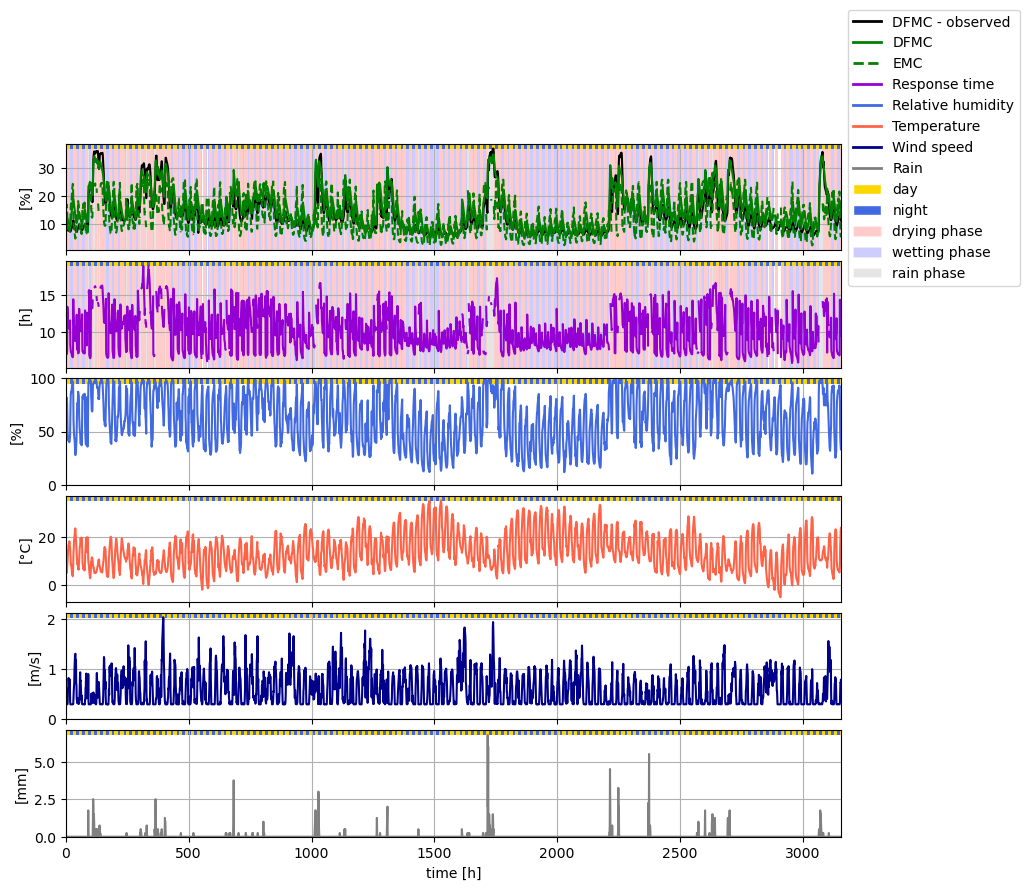

In [23]:
# Plot single time series
time_series = pd.concat([
    pd.concat([df_TS.iloc[0][c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof.iloc[0][c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
plt.show()

## BC2

In [25]:
df_TS = pd.read_pickle('data_calibration/BC/BC2.pkl')
X = np.load('data_calibration/params_calibration.npz')['params']
df_TS_gof = evaluate_model(X=X, df_TS=df_TS, type_ts='mixed')

# GoF measures
df_TS_gof

,DFMC_model,phase,EMC,K_const,MAE,BIAS,RMSE,NNSE
0,0 4.804466 1 5.065179 2 5...,0 -9999 1 1 2 1 3 ...,0 -9999.000000 1 7.603627 2 ...,0 -9999.000000 1 10.523640 2 ...,2.248458,1.386275,2.812382,0.853974


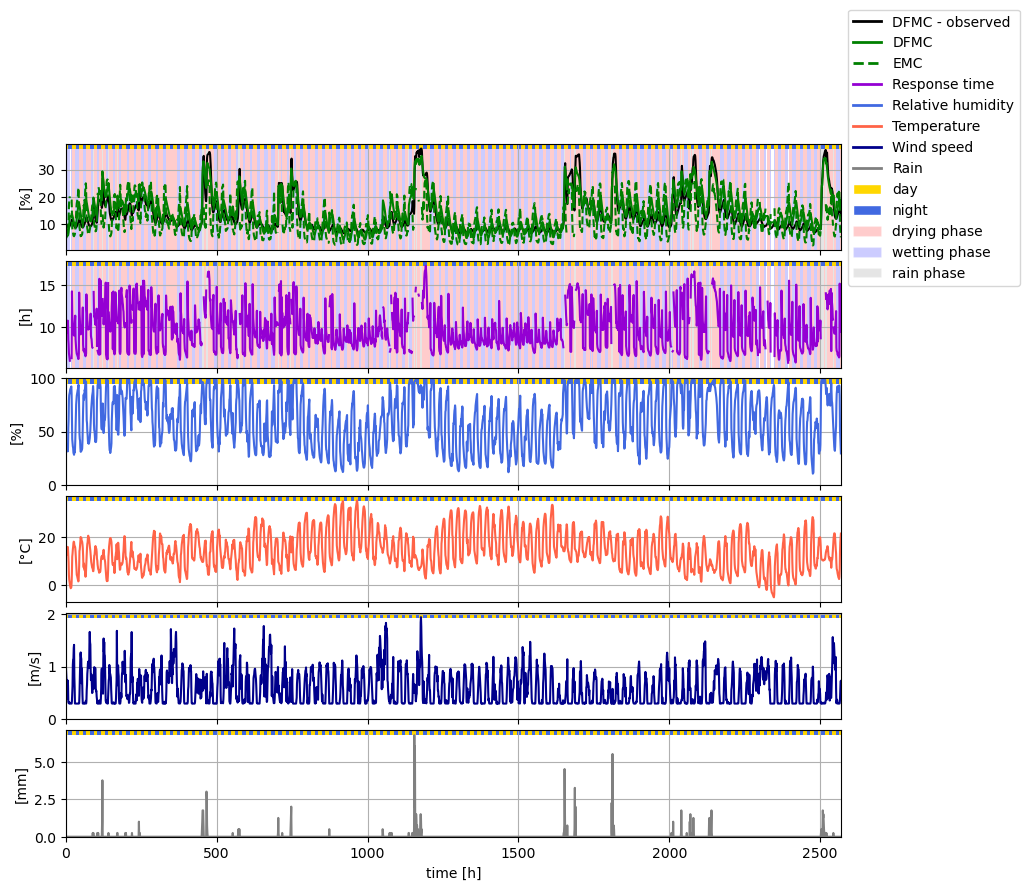

In [26]:
# Plot single time series
time_series = pd.concat([
    pd.concat([df_TS.iloc[0][c] for c in
               ['time', 'Rain', 'Temp', 'Wspeed', 'Hum', 'DFMC']], axis=1),
    pd.concat([df_TS_gof.iloc[0][c] for c in
               ['DFMC_model', 'phase', 'EMC', 'K_const']], axis=1)
], axis=1)

fig_ts = plot_time_series(time_series)
plt.show()